In [14]:
%reload_ext autoreload
%autoreload 2

#load libraries
import glob
import os
import pandas as pd
from datetime import datetime
import numpy as np
import main_funcs as mfun

import plot_funcs as pfun
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pickle


In [15]:
# IMPORTANT FOR OTHER USERS: Change these to correct paths
newPathForAnalysis = r'X:\visRepresentation\analysis' # CHANGE THIS TO YOUR ANALYSIS FOLDERPATH
infoPath = os.path.join (newPathForAnalysis, 'infoForAnalysis.pkl')
info = pd.read_pickle(infoPath)
savefigpath = os.path.join(info.figsPath) # CHANGE THIS TO YOUR FIGURE PATH

for ind in range(len(info.recordingList)):
   #get the session name
   sessionName = info.recordingList.sessionName[ind]
   info.recordingList.loc[ind, "analysispathname"] = os.path.join(newPathForAnalysis, sessionName)


In [19]:
# get only the rows that is exist as a folder in this path: C:\Users\Huriye\Documents\code\decision-making-ev\analysis
df = info.recordingList
base_dir = newPathForAnalysis

existing = {
    name for name in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, name))
}
info.recordingList = df[df['sessionName'].isin(existing)].reset_index(drop=True)

for ind, row in info.recordingList.iterrows():
    # if recordingDate is a datetime, you can do row['recordingDate'].strftime('%Y-%m-%d')
    date = row['recordingDate']        # e.g. "2023-05-29"
    rec_id = row['recordingID']        # e.g. 1
    animal = row['animalID']           # e.g. "OFZ009"

    folder = f"{date}_{rec_id}_{animal}"
    fullpath = os.path.join(base_dir, folder)

    # write it back into your DataFrame (or into info.recordingList)
    info.recordingList.at[ind, 'analysispathname'] = fullpath

# df_existing now contains only rows whose sessionName folder exists
#info.recordingList

In [20]:
# Get the data info
pfun.set_figure()
## Parameters
fRate = 1000/30
responsiveness_test_duration = 1000.0 #in ms 
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysisWindowDur = 750 # in ms
analysisWindowDur = int(np.ceil(analysisWindowDur/fRate))

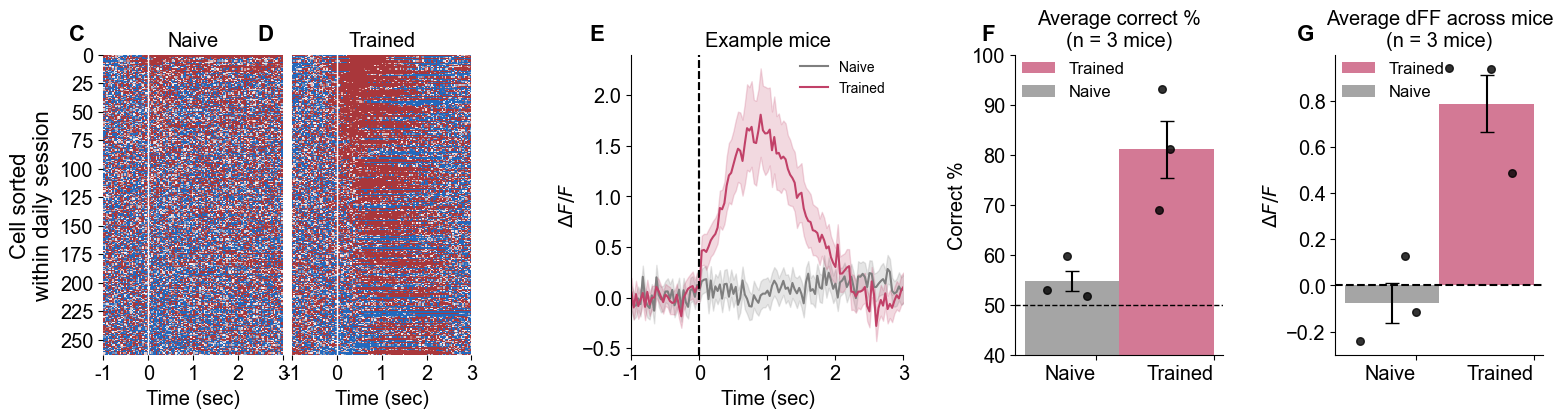

In [21]:
# Revision figure panels
pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16, 20)) # 8,11 for full A4 page - 16,20 for double page

# There will be top row from Illustrator for the schematic of the task & histology

heatmaps  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.05, top=0.20, left=0.05, right=0.28,
                              wspace=0.05, hspace=0)

ex_mice = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.20, left=0.38, right=0.55, 
                              wspace=0.2, hspace=0)

avg_beh  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.20, left=0.62, right=0.75,
                              wspace=0.2, hspace=0)

avg_dff = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.20, left=0.82, right=0.95,
                              wspace=0.2, hspace=0)


##### Panel A: Heatmaps
ax_gs_heatmaps = {xx: fig.add_subplot(heatmaps[xx]) for xx in range(2)}
selectedSession = 'WithinSession'
analysis_params = ['Large Safe']
ind =4# Naive OFZ009
dff_stimuli_filename = os.path.join(info.recordingList.analysispathname[ind],  'imaging-dffTrace_mean.pkl')
with open(dff_stimuli_filename, 'rb') as f:
        _,dff_mean_stimuli_naive, _ = pickle.load(f)
ind = 5# Trained OFZ009
dff_stimuli_filename = os.path.join(info.recordingList.analysispathname[ind],  'imaging-dffTrace_mean.pkl')
with open(dff_stimuli_filename, 'rb') as f:
      _,dff_mean_stimuli_trained, _ = pickle.load(f)


ymax = [ 0.5, -0.5]
pfun.heatmap_sessions(dff_mean_stimuli_naive,analysis_params, 'vlag',
                              selectedSession, ymax, duration='3sec', savefigname=None, 
                              savefigpath=None, axis = ax_gs_heatmaps[0],cellNumberOn=True)



pfun.heatmap_sessions(dff_mean_stimuli_trained,analysis_params, 'vlag',
                              selectedSession, ymax, duration='3sec', savefigname=None, 
                              savefigpath=None, axis = ax_gs_heatmaps[1])

ax_gs_heatmaps[0].set_title('Naive')
ax_gs_heatmaps[1].set_title('Trained')
# Add a vertical text to the left side of the first panel
ax_gs_heatmaps[0].text(-0.4, 0.5, 'Cell sorted\nwithin daily session', 
                    transform=ax_gs_heatmaps[0].transAxes, fontsize=16,
                    va='center', ha='center', rotation =90,
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))


##### Panel B: Example mice
ax_gs_ex_mice = {xx: fig.add_subplot(ex_mice[xx]) for xx in range(1)}
ind = 4# Naive OFZ009
dff_stimuli_filename = os.path.join(info.recordingList.analysispathname[ind],  'imaging-dffTrace_mean.pkl')
with open(dff_stimuli_filename, 'rb') as f:
        _,dff_mean_stimuli_naive, _ = pickle.load(f)
pfun.lineplot_sessions(dff_mean_stimuli_naive,analysis_params, 'gray_r','Naive',
                    True, duration='3sec', savefigname=None, 
                    savefigpath=None, ax= ax_gs_ex_mice[0])
ind = 5# Trained OFZ009
dff_stimuli_filename = os.path.join(info.recordingList.analysispathname[ind],  'imaging-dffTrace_mean.pkl')
with open(dff_stimuli_filename, 'rb') as f:
      _,dff_mean_stimuli_trained, _ = pickle.load(f)
pfun.lineplot_sessions(dff_mean_stimuli_trained,analysis_params, 'flare','Trained',
                    True, duration='3sec', savefigname=None, 
                    savefigpath=None, ax = ax_gs_ex_mice[0])

ax_gs_ex_mice[0].set_title('Example mice')

##### Panel C: Average behaviour
ax_gs_avg_beh =  {xx: fig.add_subplot(avg_beh[xx]) for xx in range(1)}
trained_dicts,naive_dicts   = [],[]

for ind, recDate in enumerate(info.recordingList.recordingDate):
    fn = os.path.join(info.recordingList.analysispathname[ind],
                      info.recordingList.sessionName[ind] +'_CorrectedeventTimes.csv')
    beh_df = pd.read_csv(fn, header=0)
    visTimes    = beh_df['rewardVolume']
    choiceTimes = beh_df['choiceCompleteTime']
    stimulusTimes = beh_df['choiceStartTime']
    rt = choiceTimes - stimulusTimes
    all_trials = rt<0.245
    # calculate the correct percentafe  by is nan number of rewardVolume colum divided by all trials
    correct = beh_df['rewardVolume'].notna()
    correct = (np.sum(correct)/sum(all_trials))*100

    if ind in [1,3,5]: # Trained sessions
        trained_dicts.append(correct)
    elif ind in [0,2,4]: # Naive sessions
        naive_dicts.append(correct)

trained_dicts = [trained_dicts]
naive_dicts   = [naive_dicts]
pfun.plot_trained_vs_naive_bars(
    ax_gs_avg_beh[0],
    analysis_params,
    trained_dicts,
    naive_dicts,
    palettes=('flare','gray_r'),
    width=0.1,
    ylabel='Correct %',
    title='Average correct %\n(n = 3 mice)',
    label = ['Naive','Trained'],
)
ax_gs_avg_beh[0].set_ylim(40,100)
ax_gs_avg_beh[0].axhline(y=50, color='k', linestyle='--' ,linewidth=1)

##### Panel D: Average dff
ax_gs_avg_dff =  {xx: fig.add_subplot(avg_dff[xx]) for xx in range(1)}
trained_dicts,naive_dicts   = [],[]

for ind, recDate in enumerate(info.recordingList.recordingDate):
    fn = os.path.join(info.recordingList.analysispathname[ind],
                      'imaging-dffTrace_mean.pkl')
    with open(fn,'rb') as f:
        _, dff_mean_stim, _ = pickle.load(f)

    if ind in [1,3,5]:
        trained_dicts.append(dff_mean_stim)
    elif ind in [0,2,4]:
        naive_dicts.append(dff_mean_stim)

trained_vals = pfun.session_window_means(trained_dicts,
                                    analysis_params,
                                    pre_frames, fps=30)
naive_vals   = pfun.session_window_means(naive_dicts,
                                    analysis_params,
                                    pre_frames, fps=30)

pfun.plot_trained_vs_naive_bars(
    ax_gs_avg_dff[0],
    analysis_params,
    trained_vals,
    naive_vals,
    palettes=('flare','gray_r'),
    width=0.5,
    ylabel=r'$\Delta F/F$',
    title='Average dFF across mice\n(n = 3 mice)',
    label = ['Naive','Trained'],
)


# Lets add the labels
axes = [ax_gs_heatmaps, ax_gs_ex_mice, ax_gs_avg_beh, ax_gs_avg_dff]
labels = ['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                fontweight='bold', va='top', ha='right',
                bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1


savefigname = 'RevisionFigure_EmergingVisualRepresentation'
pfun.save_figureAll(savefigname,savefigpath)
# #plt.close()